In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__, tfp.__version__

('2.3.0', '0.11.0')

In [3]:
mu = [[1, 1.7],
      [-0.5, 1.2],
      [-1, 1]] #batch 3개

In [4]:
np.shape(mu)

(3, 2)

In [5]:
scale=[0.1, 0.5]
scale = [scale, scale, scale]

In [6]:
scale, np.shape(scale)

([[0.1, 0.5], [0.1, 0.5], [0.1, 0.5]], (3, 2))

In [7]:
probs=[0.3, 0.7]

In [8]:
tfd = tfp.distributions


### Create a mixture of two scalar Gaussians:

The MixtureSameFamily distribution implements a (batch of) mixture distribution where all components are from different parameterizations of the same distribution type. 

In [9]:
gmm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(probs=probs),
    components_distribution=tfd.Normal(loc=mu,       # One for each component.
                                       scale=scale))  # And same here.

In [10]:
gmm.sample(10)

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[ 1.8299046 ,  0.96368396,  1.0942062 ],
       [ 1.2261534 ,  1.0434849 ,  1.188969  ],
       [ 0.94545966, -0.44770697, -1.0185331 ],
       [ 1.7872185 ,  0.75921476,  0.89997154],
       [ 0.97230434, -0.6340124 , -0.9507967 ],
       [ 1.2260321 , -0.49460417, -1.1232883 ],
       [ 0.97968554,  1.0982053 ,  1.5894854 ],
       [ 1.922982  ,  0.97652626,  0.8258351 ],
       [ 1.7415067 ,  2.202879  ,  2.134368  ],
       [ 1.0644113 , -0.5018674 , -1.1412112 ]], dtype=float32)>

위의 결과 출력은
shape=(10, 3)
인데, (T,B) 

In [11]:
v = gmm.prob([1.7])
print(v)

tf.Tensor([0.5585192  0.33875898 0.20961843], shape=(3,), dtype=float32)


In [12]:
a = [[1.7], [0.7]]
print(np.shape(a))
v = gmm.prob(a)

print(v)

(2, 1)
tf.Tensor(
[[0.5585192  0.33875898 0.20961843]
 [0.08888289 0.33875898 0.4665144 ]], shape=(2, 3), dtype=float32)


In [13]:
x0 = np.linspace(-2, 3, 200)
#x0 = np.linspace(-8+1, 8+1, 100)
x = x0.reshape( (-1,1))
print(x.shape)

(200, 1)


Text(0.5, 1.0, 'gmm.mean().numpy()=[1.49       0.69000006 0.39999998]')

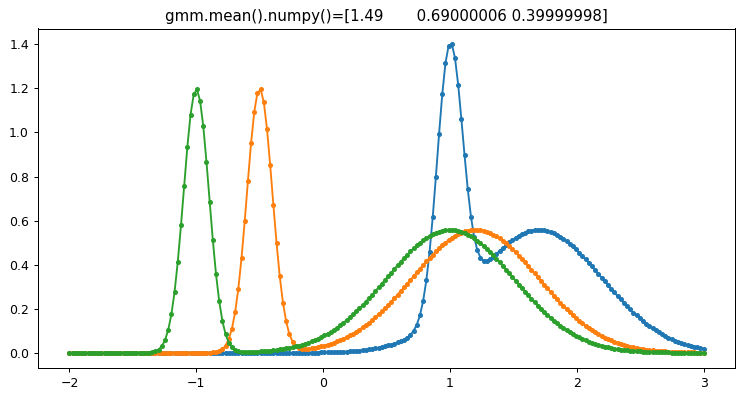

In [14]:
v = gmm.prob(x)
m = gmm.mean()

fig = plt.figure(figsize=(10,5), dpi=90)
plt.plot(x, v,'.-');
#plt.plot(x, vv[:,0],'.-');
plt.title('gmm.mean().numpy()={}'.format(m))
#print(gmm.mean().numpy())  # 23.0

https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/MixtureSameFamily